In [1]:
# EDA for Post-Op Complication Prediction Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('complication_prediction_data.csv')

In [3]:
# 1. Basic Info & Structure
# ---------------------------
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         5000 non-null   object 
 1   age                5000 non-null   int64  
 2   surgery_type       5000 non-null   object 
 3   pain_score         5000 non-null   int64  
 4   fever              5000 non-null   float64
 5   wound_status       5000 non-null   object 
 6   mobility_level     5000 non-null   object 
 7   day_of_recovery    5000 non-null   int64  
 8   complication_flag  5000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 351.7+ KB
None

First 5 Rows:
  patient_id  age    surgery_type  pain_score  fever wound_status  \
0    P100000   68      Mastectomy           7   98.4          Dry   
1    P100001   58      Mastectomy           2   96.8      Swollen   
2    P100002   44  Reconstruction           3  101.0    Disch

In [4]:
# 2. Summary Statistics
# ---------------------------
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       patient_id          age surgery_type   pain_score       fever  \
count        5000  5000.000000         5000  5000.000000  5000.00000   
unique       5000          NaN            3          NaN         NaN   
top       P100000          NaN   Lumpectomy          NaN         NaN   
freq            1          NaN         1705          NaN         NaN   
mean          NaN    54.666600          NaN     5.011000    98.60148   
std           NaN    14.384312          NaN     2.592416     1.47643   
min           NaN    30.000000          NaN     1.000000    92.70000   
25%           NaN    42.000000          NaN     3.000000    97.60000   
50%           NaN    55.000000          NaN     5.000000    98.60000   
75%           NaN    67.000000          NaN     7.000000    99.60000   
max           NaN    79.000000          NaN     9.000000   103.70000   

       wound_status mobility_level  day_of_recovery complication_flag  
count          5000           5000      50

In [5]:
# 3. Missing Values Check
# ---------------------------
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
patient_id           0
age                  0
surgery_type         0
pain_score           0
fever                0
wound_status         0
mobility_level       0
day_of_recovery      0
complication_flag    0
dtype: int64


In [6]:
# 4. Class Distribution
# ---------------------------
print("\nComplication Flag Distribution:")
print(df['complication_flag'].value_counts(normalize=True))


Complication Flag Distribution:
complication_flag
No     0.7986
Yes    0.2014
Name: proportion, dtype: float64


In [7]:
# 5. Visualizations
# ---------------------------
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Pain Score Distribution')

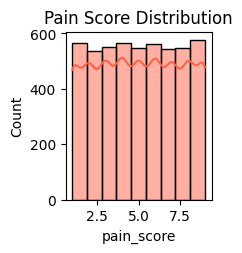

In [8]:
# Pain Score Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['pain_score'], bins=9, kde=True, color='tomato')
plt.title('Pain Score Distribution')

Text(0.5, 1.0, 'Fever Distribution')

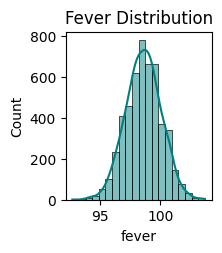

In [9]:
# Fever Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['fever'], bins=20, kde=True, color='teal')
plt.title('Fever Distribution')

Text(0.5, 1.0, 'Age Distribution')

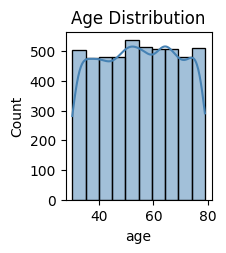

In [10]:
# Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['age'], bins=10, kde=True, color='steelblue')
plt.title('Age Distribution')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Swollen'),
  Text(2, 0, 'Discharge'),
  Text(3, 0, 'Redness'),
  Text(4, 0, 'Clean')])

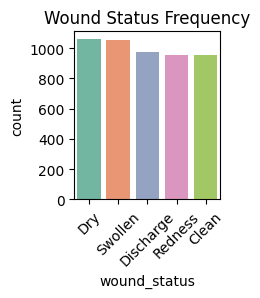

In [11]:
# Wound Status
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='wound_status', order=df['wound_status'].value_counts().index, palette='Set2')
plt.title('Wound Status Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Surgery Type Frequency')

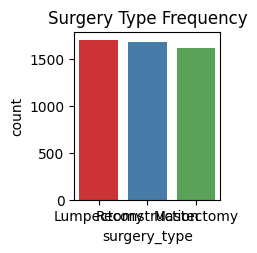

In [12]:
# Surgery Type
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='surgery_type', order=df['surgery_type'].value_counts().index, palette='Set1')
plt.title('Surgery Type Frequency')

Text(0.5, 1.0, 'Mobility Level Frequency')

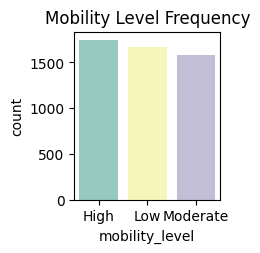

In [13]:
# Mobility Level
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='mobility_level', order=df['mobility_level'].value_counts().index, palette='Set3')
plt.title('Mobility Level Frequency')


In [14]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [15]:
# 6. Boxplots for Outliers
# ---------------------------
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Pain Score vs Complication Flag')

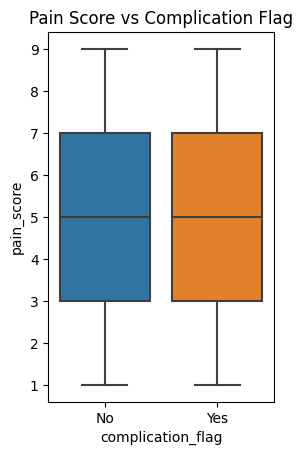

In [16]:
plt.subplot(1, 2, 1)
sns.boxplot(x='complication_flag', y='pain_score', data=df)
plt.title('Pain Score vs Complication Flag')

Text(0.5, 1.0, 'Fever vs Complication Flag')

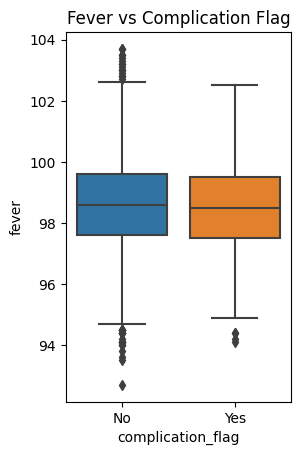

In [17]:
plt.subplot(1, 2, 2)
sns.boxplot(x='complication_flag', y='fever', data=df)
plt.title('Fever vs Complication Flag')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
# 7. Correlation Heatmap (Numerical Only)
# ---------------------------
numerics = ['age', 'pain_score', 'fever', 'day_of_recovery']
corr = df[numerics].corr()

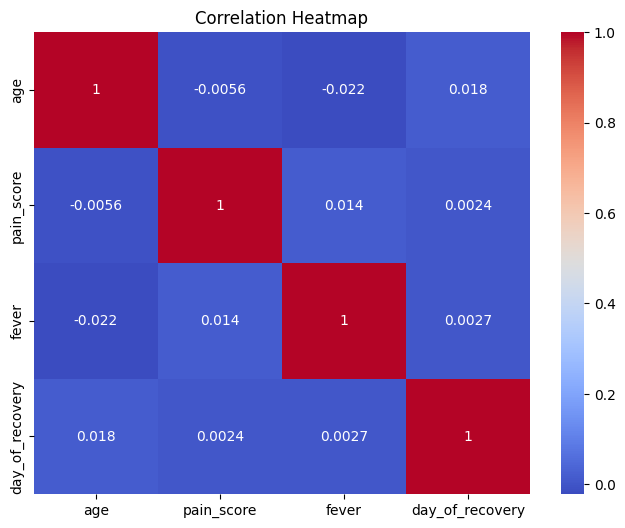

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='wound_status', ylabel='pain_score'>

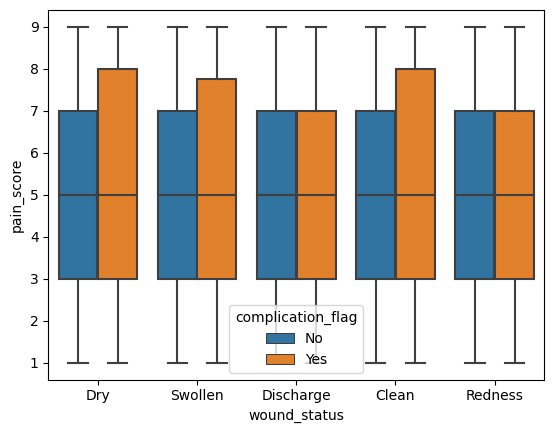

In [21]:
sns.boxplot(x='wound_status', y='pain_score', hue='complication_flag', data=df)


In [22]:
df.groupby('complication_flag')['fever'].mean()


complication_flag
No     98.623867
Yes    98.512711
Name: fever, dtype: float64

In [23]:
pd.crosstab(df['surgery_type'], df['complication_flag'], normalize='index')


complication_flag,No,Yes
surgery_type,,
Lumpectomy,0.798240,0.201760
Mastectomy,0.803715,0.196285
Reconstruction,0.794048,0.205952


<Axes: xlabel='mobility_level', ylabel='count'>

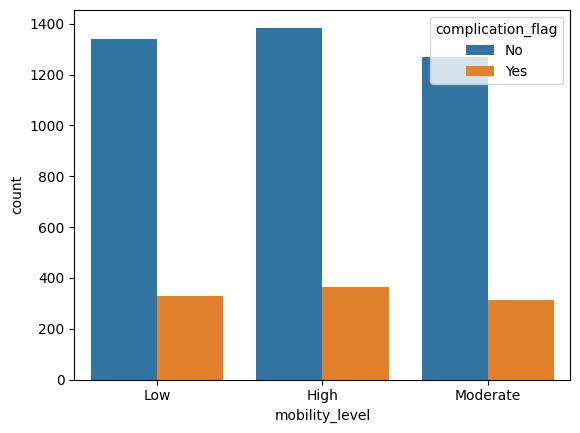

In [24]:
sns.countplot(x='mobility_level', hue='complication_flag', data=df)


In [25]:
df.duplicated().sum()


0

<Axes: xlabel='fever', ylabel='Count'>

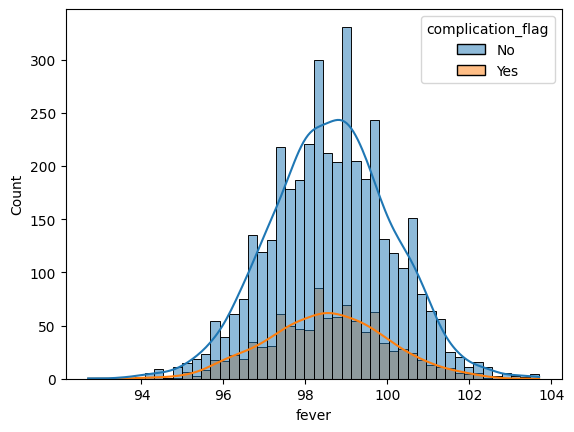

In [26]:
sns.histplot(data=df, x='fever', hue='complication_flag', kde=True)


In [27]:
# Cross Tabulation: Wound Status vs Complication Rate
crosstab_wound = pd.crosstab(df['wound_status'], df['complication_flag'], normalize='index')
print("\nNormalized Complication Rate by Wound Status:")
print(crosstab_wound)



Normalized Complication Rate by Wound Status:
complication_flag        No       Yes
wound_status                         
Clean              0.804827  0.195173
Discharge          0.810838  0.189162
Dry                0.790170  0.209830
Redness            0.794979  0.205021
Swollen            0.793365  0.206635
